# Inspect DDI Train data to test rules

Notebook to test Parser, rules and features for the DDI Train dataset.

> NOTE: StanfordCoreNLP needs to be running on a terminal before using the noteboo. Use the following command:
```bash
java -mx4g -cp 'resources/stanford-corenlp/*' edu.stanford.nlp.pipeline.StanfordCoreNLPServer
```

In [1]:
# !/usr/bin/python3
from graphviz import Digraph
from nltk.parse.corenlp import CoreNLPDependencyParser
from os import listdir, system, path, makedirs
from xml.dom.minidom import parse

In [2]:
inputdir = "data/Train"
outputfile = "data/tmp/task9.2_BASELINE_999.txt"
DependencyParser = CoreNLPDependencyParser(url="http://localhost:9000")
import DDI_baseline as ddi

--------------------------------------
--------------------------------------
--------------------------------------

In [3]:
s = "The treatment of ewes with an intravenous (IV) injection of trichlorfon, insufficient to produce significant inhibition of erythrocyte acetylcholinesterase (AChE) activity, appeared to produce additive effects with those produced by subsequent treatment with 4 mg of coumaphos/kg/day. "
entities = {
    "DDI-MedLine.d1.s6.e0": {"offset": "60-70".split("-"), "text": "trichlorfon"},
    "DDI-MedLine.d1.s6.e1": {"offset": "267-275".split("-"), "text": "coumaphos"}
}
_is_ddi = True
_ddi_type = "effect"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
The treatment of ewes with an intravenous (IV) injection of trichlorfon, insufficient to produce significant inhibition of erythrocyte acetylcholinesterase (AChE) activity, appeared to produce additive effects with those produced by subsequent treatment with 4 mg of coumaphos/kg/day. 

{'DDI-MedLine.d1.s6.e0': {'offset': ['60', '70'], 'text': 'trichlorfon'}, 'DDI-MedLine.d1.s6.e1': {'offset': ['267', '275'], 'text': 'coumaphos'}}

DDI: True - effect


In [4]:
analysis, = DependencyParser.raw_parse(s)
analysis

Exception: Cannot find the dot binary from Graphviz package

<DependencyGraph with 45 nodes>

In [5]:
nodes = analysis.nodes
effect_clues = ["produce", "administer", "potentiate", "prevent"]
clues = [n for n in nodes if nodes[n]['lemma'] in effect_clues]
print(clues)
nodes[clues[0]]

[17, 30, 35]


{'address': 17,
 'word': 'produce',
 'lemma': 'produce',
 'ctag': 'VB',
 'tag': 'VB',
 'feats': '_',
 'head': 15,
 'deps': defaultdict(list, {'mark': [16], 'dobj': [19]}),
 'rel': 'xcomp'}

In [6]:
e1, e2 = list(entities.keys())
ddi.check_interaction(analysis, entities, e1, e2)

('1', 'effect')

----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------

In [7]:
s = "Barbiturates and glutethimide should not be administered to patients receiving coumarin drugs."
entities = {
    "DDI-MedLine.d106.s6.e0": {"offset": "0-11".split("-"), "text": "Barbiturates"},
    "DDI-MedLine.d106.s6.e1": {"offset": "17-28".split("-"), "text": "glutethimide"},
    "DDI-MedLine.d106.s6.e2": {"offset": "79-92".split("-"), "text": "coumarin drugs"}
}
_is_ddi = True
_ddi_type = "advise"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
Barbiturates and glutethimide should not be administered to patients receiving coumarin drugs.

{'DDI-MedLine.d106.s6.e0': {'offset': ['0', '11'], 'text': 'Barbiturates'}, 'DDI-MedLine.d106.s6.e1': {'offset': ['17', '28'], 'text': 'glutethimide'}, 'DDI-MedLine.d106.s6.e2': {'offset': ['79', '92'], 'text': 'coumarin drugs'}}

DDI: True - advise


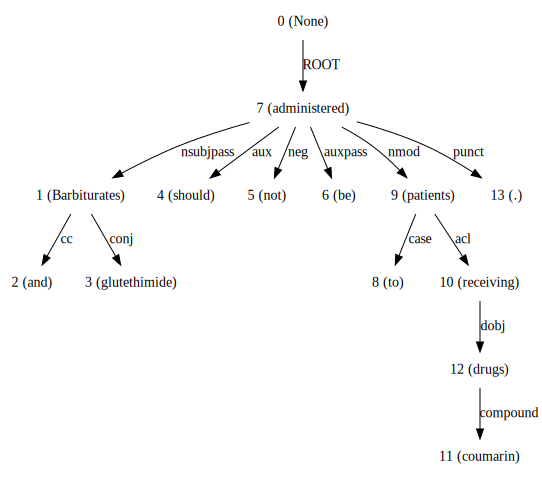

In [8]:
analysis, = DependencyParser.raw_parse(s)
analysis

In [9]:
e1, e2, e3 = list(entities.keys())
ddi.check_interaction(analysis, entities, e1, e3)

('1', 'advise')

In [10]:
ddi.check_interaction(analysis, entities, e2, e3)

('1', 'advise')

In [34]:
s = "Caution should be exercised when combining resorcinol or salicylic acid with DIFFERIN Gel"
entities = {
    "DDI-MedLine.d106.s6.e0": {"offset": "43-53".split("-"), "text": "resorcinol"},
    "DDI-MedLine.d106.s6.e1": {"offset": "57-71".split("-"), "text": "salicylic acid"},
    "DDI-MedLine.d106.s6.e2": {"offset": "77-99".split("-"), "text": "DIFFERIN Gel"}
}
_is_ddi = True
_ddi_type = "advise"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
Caution should be exercised when combining resorcinol or salicylic acid with DIFFERIN Gel

{'DDI-MedLine.d106.s6.e0': {'offset': ['43', '53'], 'text': 'resorcinol'}, 'DDI-MedLine.d106.s6.e1': {'offset': ['57', '71'], 'text': 'salicylic acid'}, 'DDI-MedLine.d106.s6.e2': {'offset': ['77', '99'], 'text': 'DIFFERIN Gel'}}

DDI: True - advise


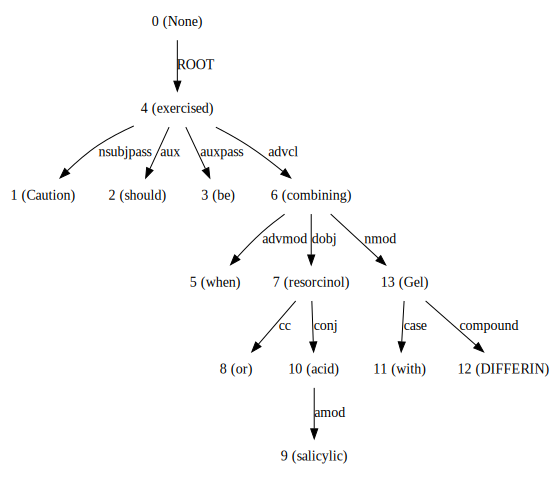

In [35]:
analysis, = DependencyParser.raw_parse(s)
analysis

In [36]:
def get_entity_node(entity, analysis, entities):
    """
    Get Entity Node.
    Function which finds the node in the Dependency Tree which corresponds to the root of the entity.
    """
    nodes = [analysis.nodes[k] for k in analysis.nodes]
    ent = entities[entity]["text"]
    possible = [node for node in nodes if node["word"] is not None and node["word"] in ent]
    node = sorted(possible, key=lambda x: x["head"])[0]
    return node

e0 = get_entity_node("DDI-MedLine.d106.s6.e0", analysis, entities)
e1 = get_entity_node("DDI-MedLine.d106.s6.e1", analysis, entities)
e2 = get_entity_node("DDI-MedLine.d106.s6.e2", analysis, entities)

In [37]:
nodes = [analysis.nodes[k] for k in analysis.nodes]

In [38]:
# e0 -conj-> e1
e0_conj = e0["deps"]["conj"][0] if len(e0["deps"]["conj"]) else -1
e0_conj_e1 = e0_conj == e1["address"]
# e1 -conj-> e2
e1_conj = e1["deps"]["conj"][0] if len(e1["deps"]["conj"]) else -1
e1_conj_e2 = e1_conj == e2["address"]

e0_conj_e1, e1_conj_e2

(True, False)

In [39]:
def get_verb_ancestor(analysis, node):
    """
    """
    nodes = analysis.nodes
    while node["tag"] != "TOP" and "VB" not in node["tag"]:
        node = nodes[node["head"]]
        if not node["tag"]:
            break
    return node
v1 = get_verb_ancestor(analysis, e1)
v2 = get_verb_ancestor(analysis, e2)

# e1_vrb == e2_vrb
v1["address"] == v2["address"]

True

In [40]:
# DDI type clues
advise_clues = ["should", "must", "may", "recommend", "caution"]
effect_clues = ["produce", "administer", "potentiate", "prevent", "effect"]
int_clues = ["interact", "interaction"]
mechanism_clues = ["reduce", "increase", "decrease"]

In [41]:
nodes = [analysis.nodes[k] for k in analysis.nodes]
clues = [n for n in nodes if n["lemma"] in advise_clues]
for clue in clues:
    address = clue["address"]
    verb_address = clue["head"]
    print(verb["address"] == address)
    print(verb["address"] == verb_address)

False
False
False
False


In [51]:
def get_dependency_address(node, dependency):
    """
    Get Dependency Address.
    Function which returns the address of a given dependency for a given node,
    or a non tractable value -1, which always evaluates to False in the
    features. To use when extracting features.
    Args:
        - node: dictionary with node to look dependencies from.
        - dependency: string with dependency name to look for in node.
    Return:
        - _: string with address of found dependency, or -1 if not found.
    """
    dep = node["deps"][dependency]
    # If dependency exists, return address
    # If dependency does not exist, return non-value
    return dep[0] if len(dep) else -1

In [53]:
get_dependency_address(v1, "dobj") == e0["address"], get_dependency_address(v2, "nmod") == e2["address"]

(True, True)

In [54]:
s = "PGF2alpha produced significantly increased vasoconstriction after a single administration of oxytocin."
entities = {
    "DDI-MedLine.d17.s4.e0": {"offset": "0-8".split("-"), "text": "PGF2alpha"},
    "DDI-MedLine.d17.s4.e1": {"offset": "93-100".split("-"), "text": "oxytocin"},
}
_is_ddi = True
_ddi_type = "effect"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
PGF2alpha produced significantly increased vasoconstriction after a single administration of oxytocin.

{'DDI-MedLine.d17.s4.e0': {'offset': ['0', '8'], 'text': 'PGF2alpha'}, 'DDI-MedLine.d17.s4.e1': {'offset': ['93', '100'], 'text': 'oxytocin'}}

DDI: True - effect


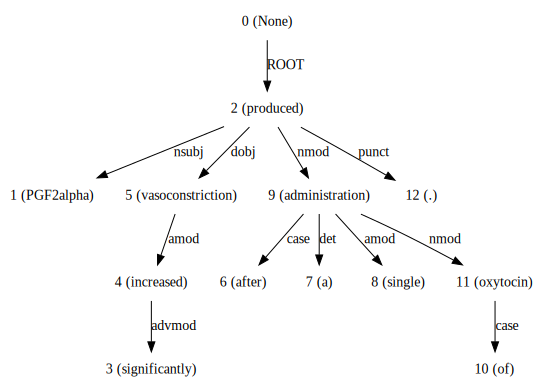

In [55]:
analysis, = DependencyParser.raw_parse(s)
analysis